<a href="https://colab.research.google.com/github/meetdelvadiya/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Meet_Delvadiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Import Statements**

In [54]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from datetime import datetime
from datetime import date

#**Mounting drive**

In [55]:
from google.colab import drive
 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Loading and inspecting data**

In [56]:
# reading CSV file from mounted drive
df=pd.read_csv("/content/drive/MyDrive/Dataset/Play Store Data.csv")
df_user=pd.read_csv("/content/drive/MyDrive/Dataset/User Reviews.csv")

In [57]:
#It gives Top 5 rows of Dataset 

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [58]:
#It gives last 5 rows of Dataset

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [59]:
#It gives total columns, data types and null count of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [60]:
# table to return datatype, null count and unique counnt
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


As we can observe, Null values in dataset:

Rating = 1474

Type = 1

Content Rating = 1

Current Ver = 8

Android Ver = 3

In [61]:
# checking null value in column 'TYPE'
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [62]:
# filling null values in column "TYPE" to free
df['Type'].fillna("Free", inplace = True)

In [63]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,0,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [64]:
# replacing null values in column "RATING" to the value of mode
modeValueRating = df['Rating'].mode()
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [65]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,0,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,0,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [66]:
# dropping unwanted columns 
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [67]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,0,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,0,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [68]:
# checcking for null values in column "CONTENT RATING"
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [69]:
df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization


In [70]:
# dropping the row 10472
df.dropna(subset = ['Content Rating'], inplace=True)

In [71]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [72]:
# changing the data type of column 'reviews'
df['Reviews'] = df.Reviews.astype(int)

In [73]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [74]:
# removing + and , sign from the column size
df['Size'] = df.Size.apply(lambda x: x.strip('+'))
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))

In [75]:
# converting M and K to multiples of 10
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))

In [76]:
# replacing varies with value of NaN
df['Size'] = df.Size.replace('Varies with device', np.NaN)

In [77]:
# changing the data type of column size
df['Size'] = pd.to_numeric(df['Size'])

In [78]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [79]:
# dropping rows with null values in column size
df.dropna(subset = ['Size'], inplace=True)

In [80]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [81]:
# removing + and , from the column installs
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))

In [82]:
# changing data type of column installs
df['Installs'] = pd.to_numeric(df['Installs'])

In [83]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [84]:
# unique values of the column price
df['Price'].value_counts()

0         8421
$0.99      145
$2.99      114
$1.99       66
$4.99       65
          ... 
$14.00       1
$1.76        1
$4.85        1
$3.08        1
$3.28        1
Name: Price, Length: 87, dtype: int64

In [85]:
# removing $ symbol from the column price
df['Price'] = df.Price.apply(lambda x: x.strip('$'))

In [86]:
# changing data type of column price
df['Price'] = pd.to_numeric(df['Price'])

In [87]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [88]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [89]:
#visualization

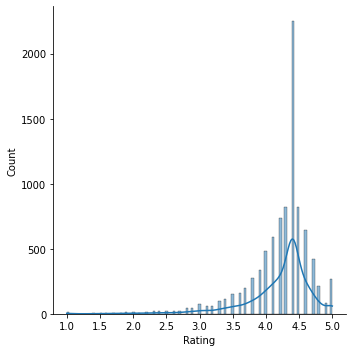

In [90]:
sns.displot(df['Rating'],kde= True )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


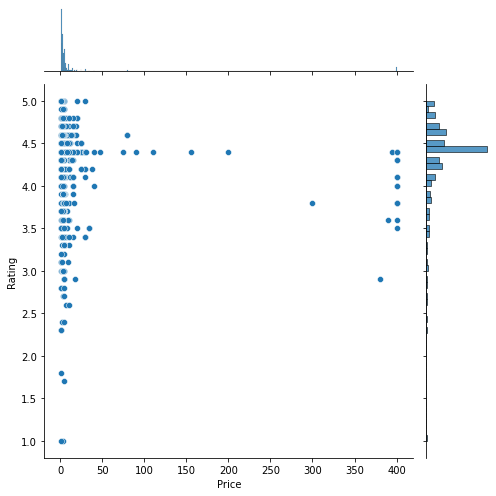

In [91]:
paid_apps =  df[df.Type == 'Paid']
sns.jointplot(data=paid_apps, x="Price", y="Rating",size=7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


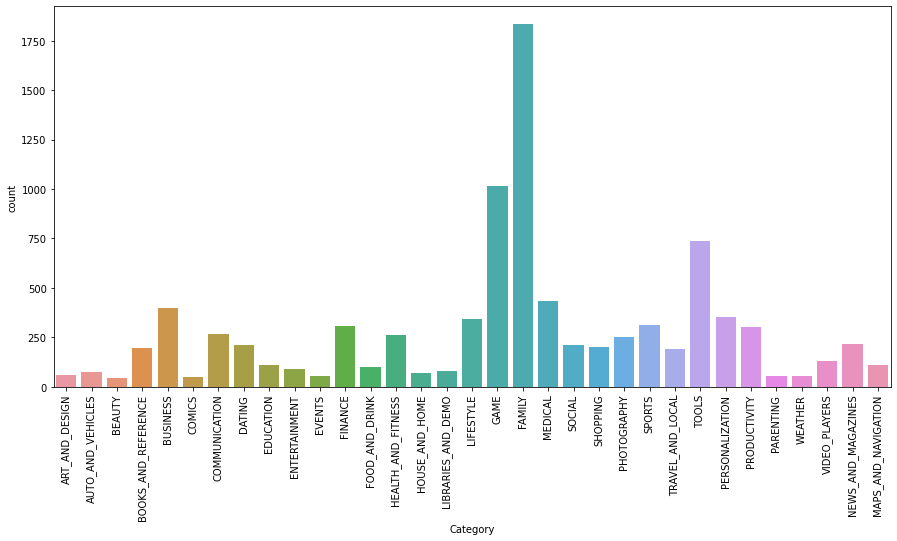

In [92]:
def plot_number_category():
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7)
    countplot=sns.categorical.countplot(df.Category,ax=ax)
    plt.xticks(rotation = 90)
    plt.show(countplot)

plot_number_category()

([<matplotlib.patches.Wedge at 0x7fbf9ad829d0>,
 [Text(-1.0661520874811603, 0.27077615544867467, 'Free'),
  Text(1.0661521128330487, -0.27077605562831114, 'Paid')],
 [Text(-0.5815375022624509, 0.14769608479018617, '92.1%'),
  Text(0.5815375160907538, -0.14769603034271517, '7.9%')])

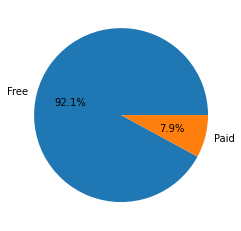

In [93]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%') 

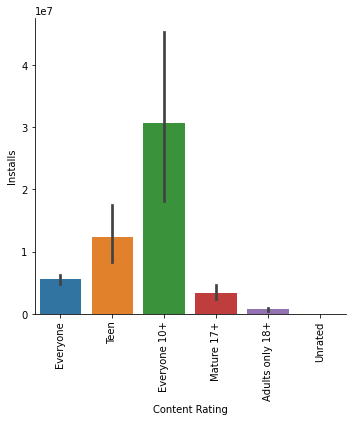

In [94]:
sns.catplot(x='Content Rating', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

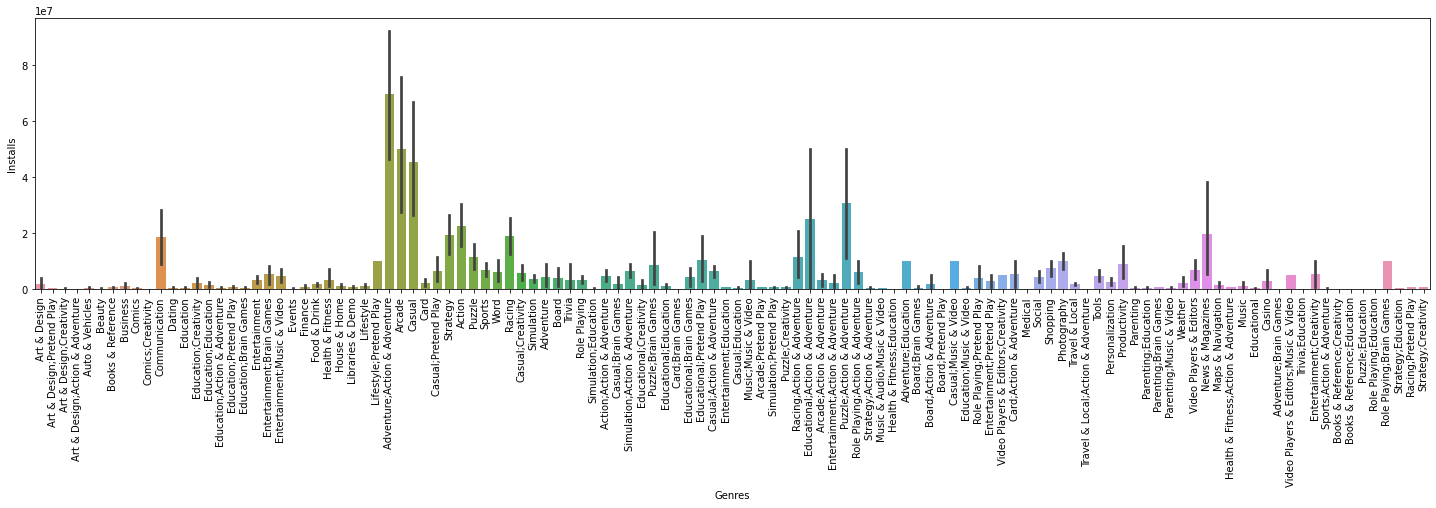

In [95]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(x='Genres', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

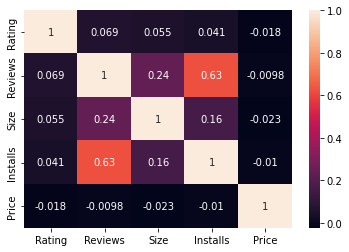

In [96]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()